In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

## An introduction to Monte Carlo with weighted bootstrap sampling

[Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) are statistical techniques that use repeated random sampling to obtain numerical results.  

A benefit of using monte carlo methods to estimate uncertainty compared to 'medium', 'high' and 'low' estimates is the tighter uncertainty bounds using monte carlo approaches as a result of minimal sampling of unlikely events.  This interpretation assumes that uncertainty bounds are well understood, which is often not the case as a result of unknown unknown's and known unknowns that are not accounted for.

For example, suppose we want to add or multiplying two parameters (x1, x2) that have are estimated to be normally distributed with mean of 4 and 5, and standard deviation of 1 and 2 respectively.  A convenient notation to describe these two normally distributed parameters is:
- x1: N~(4,1)
- x2: N~(5,2)

We can use monte carlo methods to estimate the product of x1 and x2 by sampling from their distributions:
y = N~(4,1) * N(5,2)

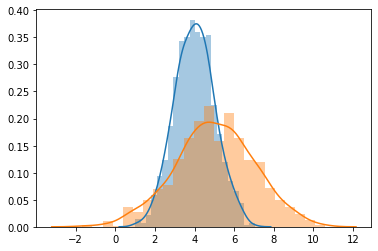

In [2]:
samples = 1000
x1 = np.random.normal(4,1, samples)
x2 = np.random.normal(5,2,samples)
sns.distplot(x1)
sns.distplot(x2)

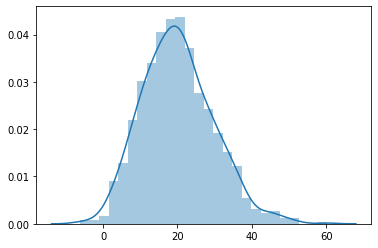

In [3]:
y = x1 * x2
sns.distplot(y)

In addition to sampling measured parameters from distributions, sometimes we have a need to reconcile parameter estimates from different sources.  For example, say we have 3  estimates of x1 that we refer to as x1_0, x1_.., x1_9.  In this example each of these estimates is a point value with no describtive statistics to indicate uncertainty.  With a large sample size, sample statistics (mean, standard deviation) can be estimated from using each of the individual estimates.  With smaller sample sizes, bootstrap sampling with replacement is one technique that can be used to estimate the underlying distribution of the point estimates.  

Say that instead of having an estimate for x1 of N~(4,1) we have five estimates of x1:
- x1_1=3
- x1_2=4.5
- x1_=7
- x1_=3.5
- x1_=5

We can estimate the distribution for this limited number of samples using bootstrap sampling with replacement.

In [4]:
def bootstrap_weighted(array, n_samples, length, p=None):
    """
    Weighted bootstrap sampling with replacement.
    
    length : int
        Length of return value.
    p : ndarray
        Probability for each value in array.
    array : ndarray
        Array to sample from.
    n_samples : int
        Number of samples with replacement
        
        
    """
    if p == None:
        print("No p array given so assuming equal weighting")
        p = np.array(len(array)*[1/len(array)])
    if not np.equal(sum(p),1):
        print("p should sum to 1, but sum is {}".format(sum(p)))
    response = np.zeros(length)
    for i in range(length):
        weighted_samples = np.random.choice(array, size=n_samples, replace=True, p=p)
        response[i] = np.mean(weighted_samples)
    return response

No p array given so assuming equal weighting


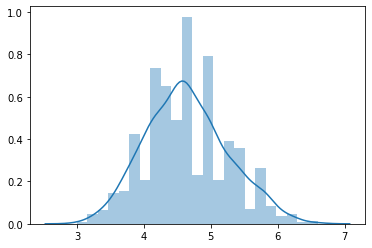

In [5]:
x1_bootstrap = bootstrap_weighted([3,4.5,7,3.5,5], n_samples=5, length=1000)
sns.distplot(x1_bootstrap)

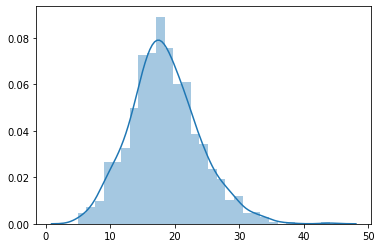

In [6]:
samples = 1000
y = np.random.normal(4,1, samples)*x1_bootstrap
sns.distplot(y)

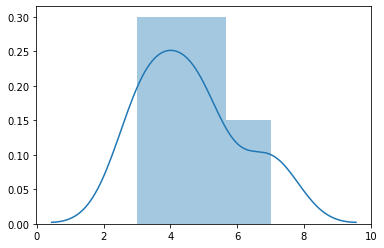

In [7]:
x1 = [3,4.5,7,3.5,5]
sns.distplot(x1)

In [8]:
print("sample statistics from raw data")
print("mean: {}".format(np.mean(x1)))
print("std: {}".format(np.std(x1)))
print("-----------")
print("sample statistics from bootstrap sampling with replacement")
print("mean: {}".format(np.mean(x1_bootstrap)))
print("std: {}".format(np.std(x1_bootstrap)))

sample statistics from raw data
mean: 4.6
std: 1.3928388277184118
-----------
sample statistics from bootstrap sampling with replacement
mean: 4.6393
std: 0.6106926477369775


The weighted bootsrap method we have defined above also given us the opportunity to weight the individual estimates.  Perhaps there is some evidence to suggest that certain parameter estimates are more likely or valid than others (e.g. measurement procedures follow standard practices).  We can use this information to influence the sampling procedure.

sample statistics from bootstrap sampling with replacement
mean: 5.597200000000001
std: 0.6749312261260402


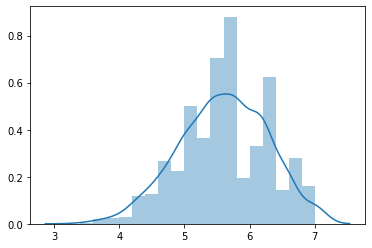

In [9]:
x1_bootstrap = bootstrap_weighted([3,4.5,7,3.5,5], n_samples=5, length=1000, p=[0.1,0.1,0.5,0.1,0.2])
print("sample statistics from bootstrap sampling with replacement")
print("mean: {}".format(np.mean(x1_bootstrap)))
print("std: {}".format(np.std(x1_bootstrap)))
sns.distplot(x1_bootstrap)

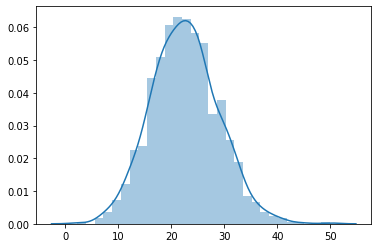

In [10]:
samples = 1000
y = np.random.normal(4,1, samples)*x1_bootstrap
sns.distplot(y)